In [44]:
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd



In [45]:
simData = pd.read_csv("data/earth_orbit_simulation.csv")
simData.head()

,time,x,y,vx,vy
0,0,1.496000e+11,0.000000e+00,0.000000,29783.000000
1,21600,1.495972e+11,6.433128e+08,-128.124172,29783.000000
2,43200,1.495917e+11,1.286614e+09,-256.249530,29782.449023
3,64800,1.495834e+11,1.929891e+09,-384.373707,29781.347048
4,86400,1.495723e+11,2.573132e+09,-512.494335,29779.694065


In [46]:
X_feature = simData[['time']]     # input feature
y_target_x = simData['x']         # target for x-coordinate
y_target_y = simData['y']         # target for y-coordinate



In [47]:
# Split the data for both x and y prediction models
# As always 42 for the meaning of life, the universe and everything
X_train, X_test, y_train_x, y_test_x = train_test_split(X_feature, y_target_x, test_size=0.2, random_state=42)
_, _, y_train_y, y_test_y = train_test_split(X_feature, y_target_y, test_size=0.2, random_state=42)



In [48]:
# Train model for x prediction
# As always 42 for the meaning of life, the universe and everything

rf_model_x = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_x.fit(X_train, y_train_x)

# Train model for y prediction
# As always 42 for the meaning of life, the universe and everything

rf_model_y = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_y.fit(X_train, y_train_y)

RandomForestRegressor(random_state=42)

In [49]:
# Predict x and y from test time values
y_pred_x = rf_model_x.predict(X_test)
y_pred_y = rf_model_y.predict(X_test)


In [50]:
# X predictions
print("X - MSE:", mean_squared_error(y_test_x, y_pred_x))
print("X - R² Score:", r2_score(y_test_x, y_pred_x))

# Y predictions
print("Y - MSE:", mean_squared_error(y_test_y, y_pred_y))
print("Y - R² Score:", r2_score(y_test_y, y_pred_y))

X - MSE: 1.0142178823118677e+17
X - R² Score: 0.9999904514084081
Y - MSE: 7.435371519899451e+16
Y - R² Score: 0.9999936390302463


In [51]:
# Generate predictions for the full dataset
y_pred_x_full = rf_model_x.predict(X_feature)
y_pred_y_full = rf_model_y.predict(X_feature)



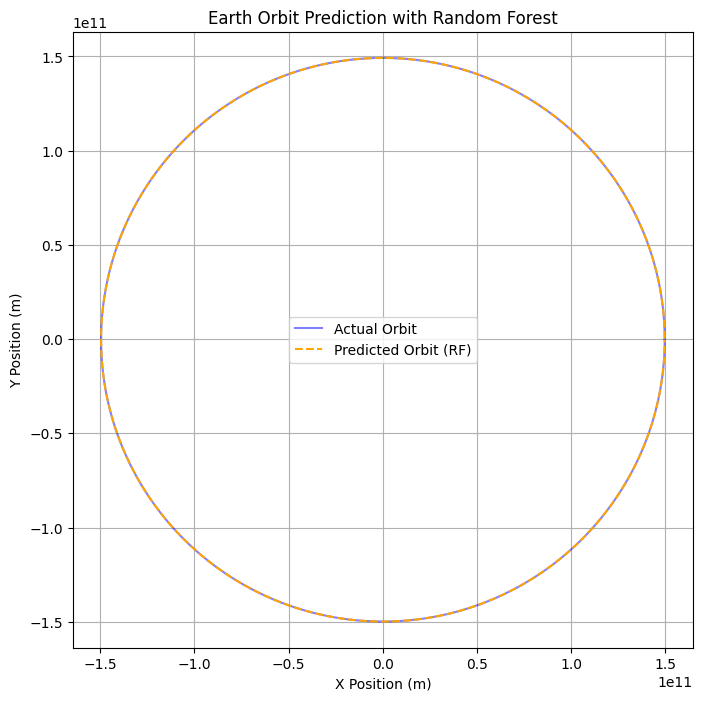

In [52]:

# Plot actual vs predicted orbit
plt.figure(figsize=(8, 8))
plt.plot(y_target_x, y_target_y, label='Actual Orbit', color='blue', alpha=0.5)
plt.plot(y_pred_x_full, y_pred_y_full, label='Predicted Orbit (RF)', color='orange', linestyle='--')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Earth Orbit Prediction with Random Forest')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [53]:
# Train Linear Regression models
lr_model_x = LinearRegression()
lr_model_x.fit(X_feature, y_target_x)

lr_model_y = LinearRegression()
lr_model_y.fit(X_feature, y_target_y)

# Predict using Linear Regression
y_pred_x_lr = lr_model_x.predict(X_feature)
y_pred_y_lr = lr_model_y.predict(X_feature)

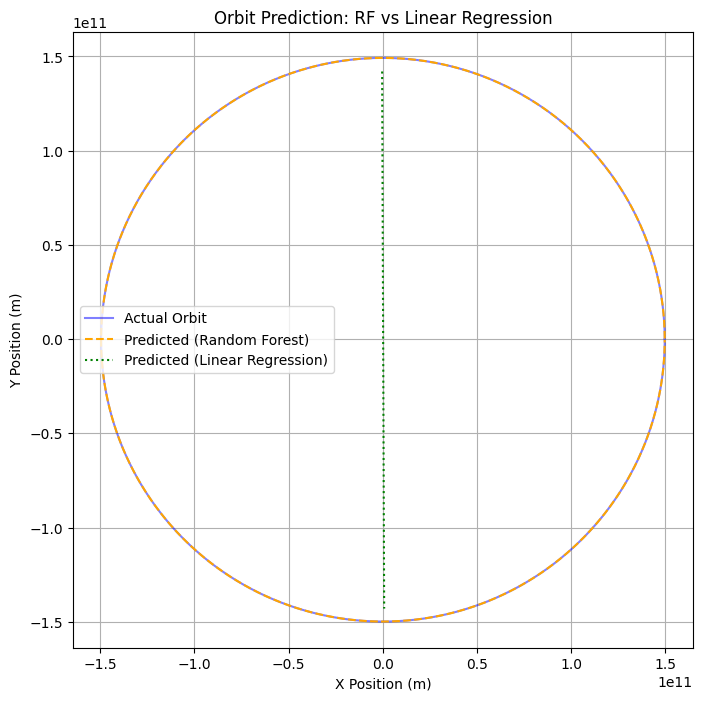

In [54]:
# Plot all three orbits
plt.figure(figsize=(8, 8))

# Actual
plt.plot(y_target_x, y_target_y, label='Actual Orbit', color='blue', alpha=0.5)

# Random Forest
plt.plot(y_pred_x_full, y_pred_y_full, label='Predicted (Random Forest)', color='orange', linestyle='--')

# Linear Regression
plt.plot(y_pred_x_lr, y_pred_y_lr, label='Predicted (Linear Regression)', color='green', linestyle=':')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Orbit Prediction: RF vs Linear Regression')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


In [55]:
print("Linear Regression R² X:", r2_score(y_target_x, y_pred_x_lr))
print("Linear Regression R² Y:", r2_score(y_target_y, y_pred_y_lr))

Linear Regression R² X: 8.642054878493788e-06
Linear Regression R² Y: 0.6065444701371452
